In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('car_price_prediction.csv')

In [7]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [9]:
df.shape

(19237, 18)

In [11]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [15]:
df.duplicated().sum()

313

In [17]:
df.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [19]:
# get the most 5 frequent items in each column in a new dataframe
most_frequent_items = df.apply(lambda x: x.value_counts().head(5).index.tolist())
most_frequent_items_df = pd.DataFrame(most_frequent_items)
most_frequent_items_df

,0
ID,"[45815365, 45815361, 45815363, 45815368, 45723..."
Price,"[15681, 470, 14113, 392, 314]"
Levy,"[-, 765, 891, 639, 640]"
Manufacturer,"[HYUNDAI, TOYOTA, MERCEDES-BENZ, FORD, CHEVROLET]"
Model,"[Prius, Sonata, Camry, Elantra, E 350]"
Prod. year,"[2012, 2014, 2013, 2011, 2015]"
Category,"[Sedan, Jeep, Hatchback, Minivan, Coupe]"
Leather interior,"[Yes, No]"
Fuel type,"[Petrol, Diesel, Hybrid, LPG, CNG]"
Engine volume,"[2, 2.5, 1.8, 1.6, 1.5]"


In [21]:
df.drop_duplicates(inplace=True)

In [23]:
df.drop('ID', axis=1, inplace=True)

In [25]:
df['Levy'].value_counts().head() / len(df)*100

Levy
-      30.168041
765     2.547030
891     2.393786
639     2.129571
640     2.103149
Name: count, dtype: float64

In [27]:
df['Levy'] = df['Levy'].replace('-', 0)
df['Levy'] = df['Levy'].astype(float)

In [29]:
df['Engine volume'] = df['Engine volume'].str.split(' ').str[0].astype(float)

In [31]:
df['Mileage']= df['Mileage'].str.split(' ').str[0].astype(float)

In [33]:
df['Cylinders'] = df['Cylinders'].astype(int)

In [35]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [37]:
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
lowerBound = Q1 - 1.5 * IQR
upperBound = Q3 + 1.5 * IQR
df = df[~((df[numerical_columns] < lowerBound) | (df[numerical_columns] > upperBound)).any(axis=1)]

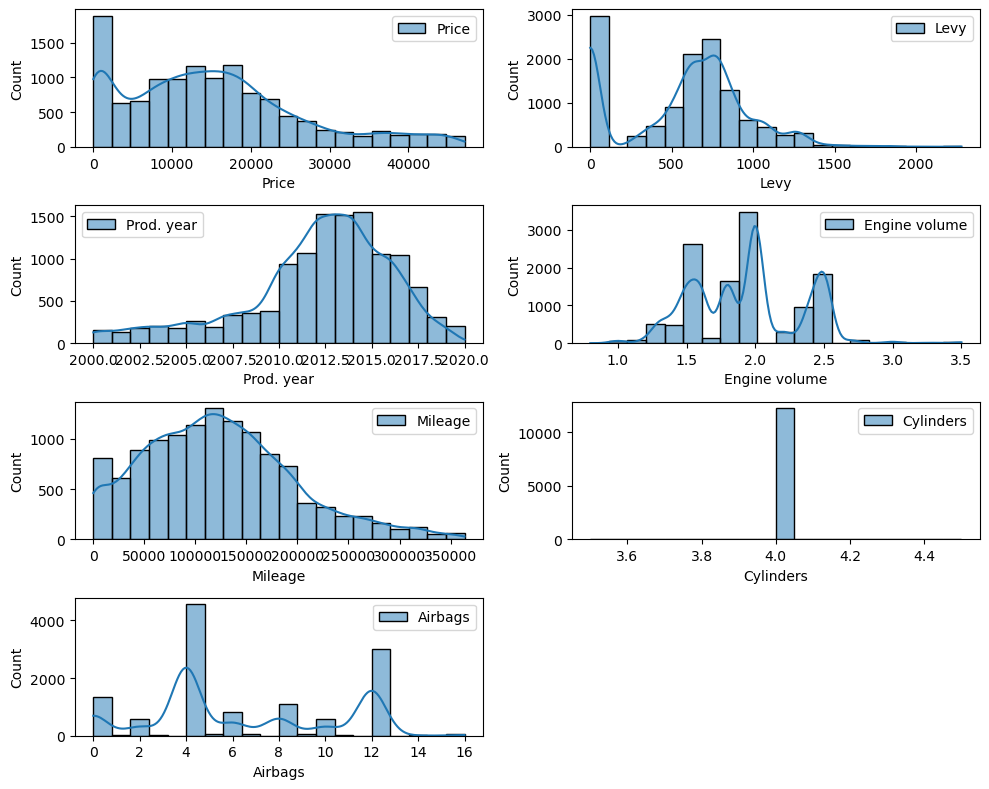

In [39]:
plt.figure(figsize=(10, 8))

for i, column in enumerate(numerical_columns):
    plt.subplot(4,2,i + 1)
    sns.histplot(df[column], bins=20, alpha=0.5, label=column, kde=True)
    plt.legend()
    plt.xlabel(column)
plt.tight_layout()
plt.show()

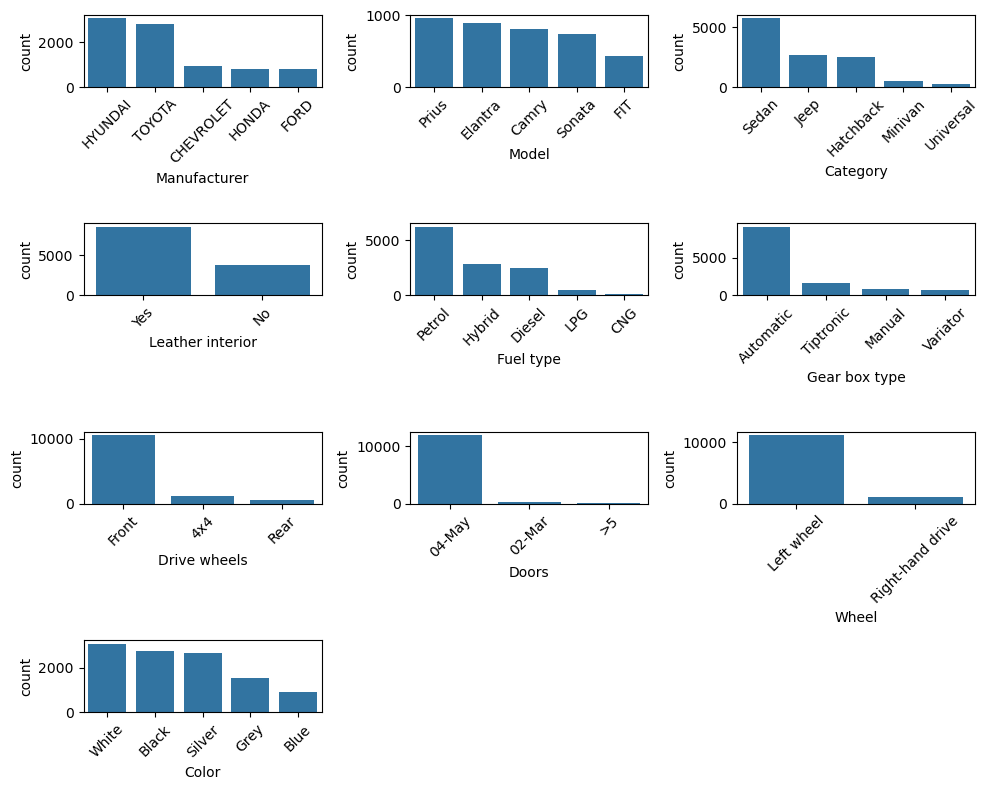

In [40]:
plt.figure(figsize=(10, 8))

for i, column in enumerate(categorical_columns):
    plt.subplot(4,3,i + 1)
    sns.countplot(x = df[column],order = df[column].value_counts().index[0:5])
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

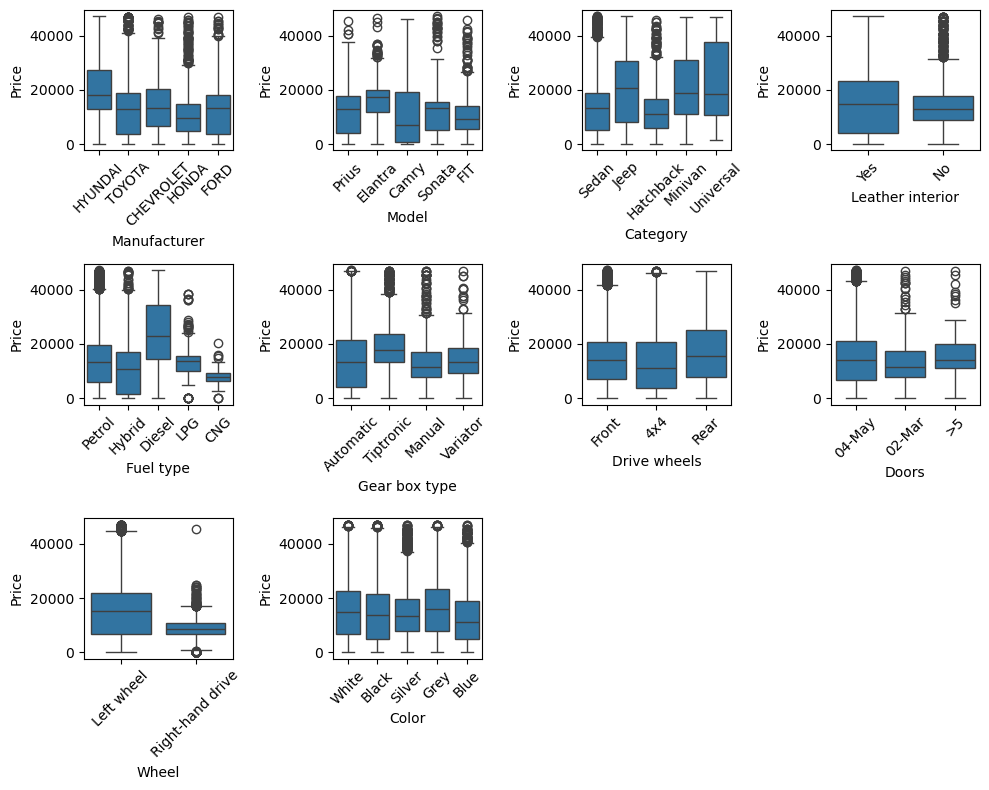

In [43]:
plt.figure(figsize=(10, 8))

for i, column in enumerate(categorical_columns):
    plt.subplot(3,4,i + 1)
    sns.boxplot(y=df['Price'],x = df[column],order = df[column].value_counts().index[0:5])
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [45]:
encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = encoder.fit_transform(df[column])
df.sample(5)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
6509,37006,0.0,36,323,2017,4,0,4,1.6,39000.0,4,1,1,1,0,7,4
1309,5331,0.0,33,263,2003,2,0,1,1.7,111111.0,4,1,1,0,0,14,2
10307,12800,0.0,13,817,2001,5,0,1,2.0,0.0,4,1,1,0,0,14,2
7208,18669,862.0,18,465,2011,6,1,1,2.5,65564.0,4,0,1,1,0,12,4
2031,10663,0.0,31,628,2003,4,0,4,2.4,156000.0,4,2,0,1,0,12,4


In [47]:
corr = df.corr()
corr

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
Price,1.000000,0.089220,-0.058435,0.077600,0.294484,-0.054156,0.073787,-0.189799,0.118389,-0.172265,NaN,0.073859,0.053566,0.027121,-0.181096,0.026654,-0.112270
Levy,0.089220,1.000000,-0.114893,-0.040799,0.423877,0.099479,0.329647,-0.066696,0.277967,-0.127938,NaN,-0.263457,-0.004338,0.094374,-0.224446,0.002962,0.065321
Manufacturer,-0.058435,-0.114893,1.000000,-0.018874,-0.080975,-0.083813,-0.171536,-0.061625,0.089850,0.052309,NaN,0.111776,-0.087462,0.034259,0.090352,0.011476,0.219930
Model,0.077600,-0.040799,-0.018874,1.000000,-0.076448,-0.134411,-0.058258,-0.177789,0.012429,0.142333,NaN,-0.012852,-0.078047,0.035216,-0.043901,0.066088,-0.140083
Prod. year,0.294484,0.423877,-0.080975,-0.076448,1.000000,0.178115,0.390842,0.083133,0.093831,-0.297916,NaN,-0.193795,-0.022470,0.129151,-0.373056,-0.041388,0.244489
Category,-0.054156,0.099479,-0.083813,-0.134411,0.178115,1.000000,0.151242,0.163273,0.246266,-0.010441,NaN,-0.035525,0.115046,0.183627,-0.173536,-0.039305,0.170231
Leather interior,0.073787,0.329647,-0.171536,-0.058258,0.390842,0.151242,1.000000,-0.069014,0.207809,-0.051467,NaN,-0.347706,0.016421,0.079326,-0.364237,-0.031513,0.043114
Fuel type,-0.189799,-0.066696,-0.061625,-0.177789,0.083133,0.163273,-0.069014,1.000000,-0.157095,-0.159688,NaN,0.103311,-0.145161,-0.016231,0.088974,-0.113692,0.187286
Engine volume,0.118389,0.277967,0.089850,0.012429,0.093831,0.246266,0.207809,-0.157095,1.000000,0.075247,NaN,-0.060429,-0.060911,0.050956,-0.263421,-0.043303,0.172466
Mileage,-0.172265,-0.127938,0.052309,0.142333,-0.297916,-0.010441,-0.051467,-0.159688,0.075247,1.000000,NaN,0.023076,0.022119,-0.010813,0.008968,0.041456,-0.082556


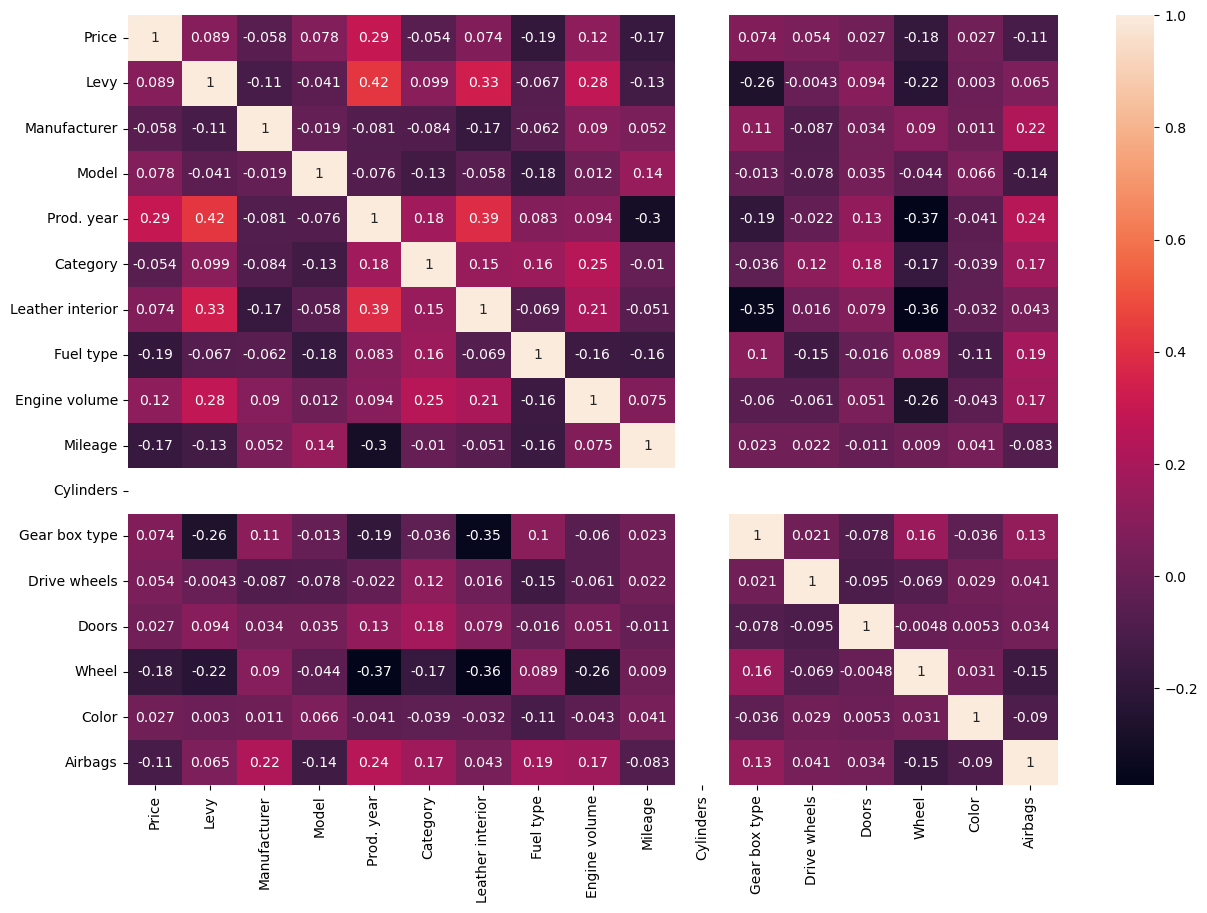

In [53]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.show()

In [24]:
x=df.drop(['Price','Color','Doors','Cylinders','Drive wheels'],axis=1)
y = df['Price']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [27]:
print(r2_score(y_test, y_pred)  )
print(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R² Score: {r2:.8f}")
print(f"Mean Squared Error: {mse:.3f}")

0.7630240727628363
29912852.14103333
R² Score: 0.76302407
Mean Squared Error: 29912852.141


R² Score: 0.701
Mean Squared Error: 93291719.848


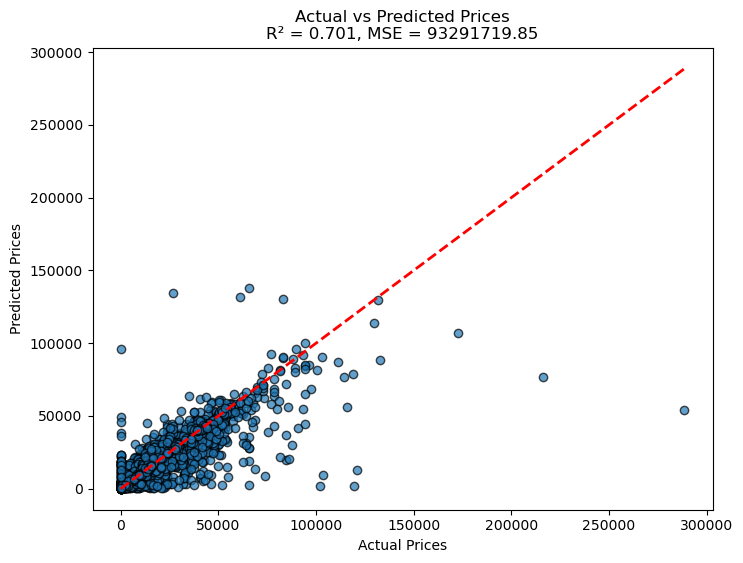

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# --- Load dataset ---
data = pd.read_csv("car_price_prediction.csv")

# --- Preprocess data (example setup, adjust according to your dataset) ---
# Drop rows with missing values
data = data.dropna()

# Define feature and target columns
X = data.drop(columns=['Price'])
y = data['Price']

# Convert categorical features to numeric
X = pd.get_dummies(X, drop_first=True)

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Train Random Forest model ---
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- Make predictions ---
y_pred = model.predict(X_test)

# --- Evaluate model ---
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R² Score: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")

# --- Plot Actual vs Predicted ---
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title(f"Actual vs Predicted Prices\nR² = {r2:.3f}, MSE = {mse:.2f}")
# Add a line of equality
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, 'r--', linewidth=2)
plt.show()

R²:  0.4215
MSE: 180266877.9917


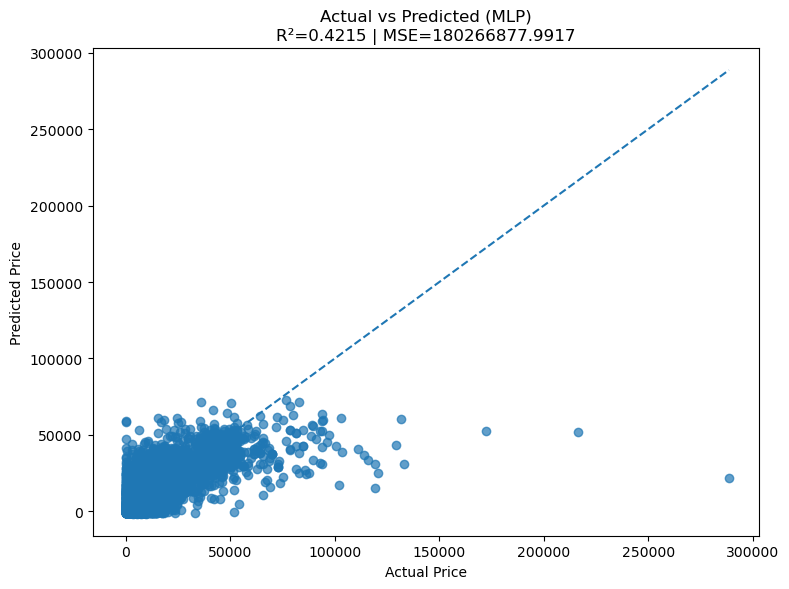

In [29]:
# Deep learning-style regression with a Multi-Layer Perceptron (MLP)
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt

# --- Load data ---
df = pd.read_csv("car_price_prediction.csv")

# --- Basic cleanup ---
df = df.dropna(axis=0)

# --- Target & features ---
TARGET = "Price"
y = df[TARGET]
X = df.drop(columns=[TARGET])

# --- Identify numeric & categorical columns ---
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

# --- Preprocess: scale numerics, one-hot encode categoricals ---
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", "passthrough", categorical_cols)
    ],
    remainder="drop"
)

# One-hot encode categoricals separately to keep pipeline tidy
from sklearn.preprocessing import OneHotEncoder
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols)
    ],
    remainder="drop"
)

# --- Model: MLPRegressor (a feed-forward neural net) ---
mlp = MLPRegressor(
    hidden_layer_sizes=(128, 64), 
    activation="relu",
    solver="adam",
    learning_rate_init=1e-3,
    max_iter=400,
    random_state=42,
    early_stopping=True,
    n_iter_no_change=15,
    validation_fraction=0.15
)

# --- Pipeline: preprocess -> model ---
pipe = Pipeline(steps=[("prep", preprocess), ("model", mlp)])

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Fit ---
pipe.fit(X_train, y_train)

# --- Predict & Evaluate ---
y_pred = pipe.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R²:  {r2:.4f}")
print(f"MSE: {mse:.4f}")

# --- Plot: Actual vs Predicted ---
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"Actual vs Predicted (MLP)\nR²={r2:.4f} | MSE={mse:.4f}")

# y=x reference line
vmin = min(y_test.min(), y_pred.min())
vmax = max(y_test.max(), y_pred.max())
plt.plot([vmin, vmax], [vmin, vmax], linestyle="--")
plt.tight_layout()
plt.show()


R² Score: 0.701
Mean Squared Error: 93291719.848
Root Mean Squared Error: 9658.764


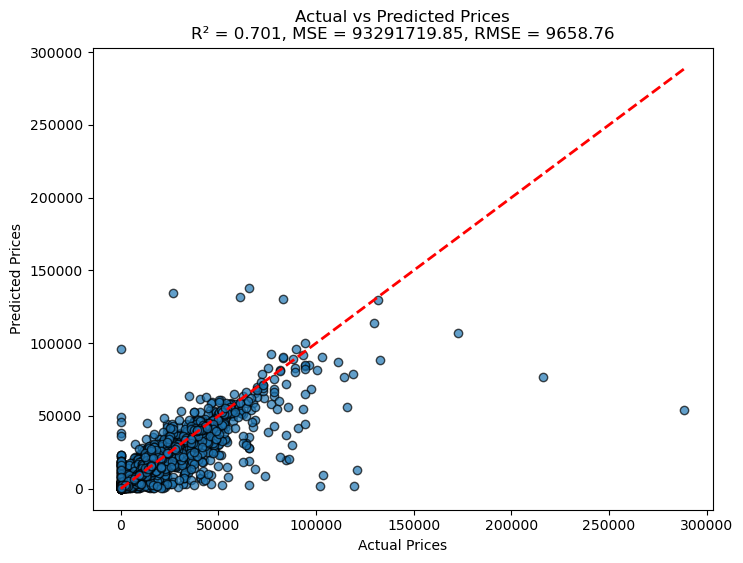

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
# --- Load dataset ---
data = pd.read_csv("car_price_prediction.csv")
# --- Preprocess data (example setup, adjust according to your dataset) ---
# Drop rows with missing values
data = data.dropna()
# Define feature and target columns
X = data.drop(columns=['Price'])
y = data['Price']
# Convert categorical features to numeric
X = pd.get_dummies(X, drop_first=True)
# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# --- Train Random Forest model ---
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# --- Make predictions ---
y_pred = model.predict(X_test)
# --- Evaluate model ---
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")

# --- Plot Actual vs Predicted ---
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title(f"Actual vs Predicted Prices\nR² = {r2:.3f}, MSE = {mse:.2f}, RMSE = {rmse:.2f}")
# Add a line of equality
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, 'r--', linewidth=2)
plt.show()

#### import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# --- Load dataset ---
data = pd.read_csv("car_price_prediction.csv")

# --- Preprocess data ---
# Drop rows with missing values
data = data.dropna()

# Define feature and target columns
X = data.drop(columns=['Price'])
y = data['Price']

# Convert categorical features to numeric
X = pd.get_dummies(X, drop_first=True)

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Feature Scaling (important for neural networks) ---
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scale target variable as well
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# --- Build Feedforward Neural Network ---
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# --- Compile model ---
# Using Huber loss which is more robust to outliers
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='huber',
    metrics=['mae']
)

# --- Early stopping to prevent overfitting ---
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

# Learning rate reduction
reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=0.00001
)

# --- Train model ---
history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# --- Make predictions ---
y_pred_scaled = model.predict(X_test_scaled).flatten()

# Inverse transform predictions back to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# --- Evaluate model ---
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\n" + "="*50)
print("MODEL EVALUATION METRICS")
print("="*50)
print(f"R² Score: {r2:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print("="*50)

# --- Plot Training History ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss plot
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (MSE)')
axes[0].set_title('Training and Validation Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Actual vs Predicted
axes[1].scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
axes[1].set_xlabel("Actual Prices")
axes[1].set_ylabel("Predicted Prices")
axes[1].set_title(f"Actual vs Predicted Prices\nR² = {r2:.3f}, RMSE = {rmse:.2f}")

# Add line of equality
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
axes[1].plot(lims, lims, 'r--', linewidth=2, label='Perfect Prediction')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# --- Model Summary ---
print("\nMODEL ARCHITECTURE:")
model.summary()

Epoch 1/300
193/193 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.2061 - mae: 0.2771 - val_loss: 0.1537 - val_mae: 0.1189 - learning_rate: 0.0010
Epoch 2/300
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1643 - mae: 0.1369 - val_loss: 0.1404 - val_mae: 0.0651 - learning_rate: 0.0010
Epoch 3/300
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1455 - mae: 0.0969 - val_loss: 0.1223 - val_mae: 0.0521 - learning_rate: 0.0010
Epoch 4/300
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1251 - mae: 0.0799 - val_loss: 0.1038 - val_mae: 0.0507 - learning_rate: 0.0010
Epoch 5/300
193/193 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1067 - mae: 0.0719 - val_loss: 0.0872 - val_mae: 0.0484 - learning_rate: 0.0010
Epoch 6/300
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0907 - mae: 0.0663 - val_loss: 0.0727 - val_mae: 0.0490 - learning_rate: 0.0010
Epoch 7/300
193/193 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0772 - mae: 0.0633 - val_loss: 0.0605 - val_mae: 0.0448 - learning_rate:

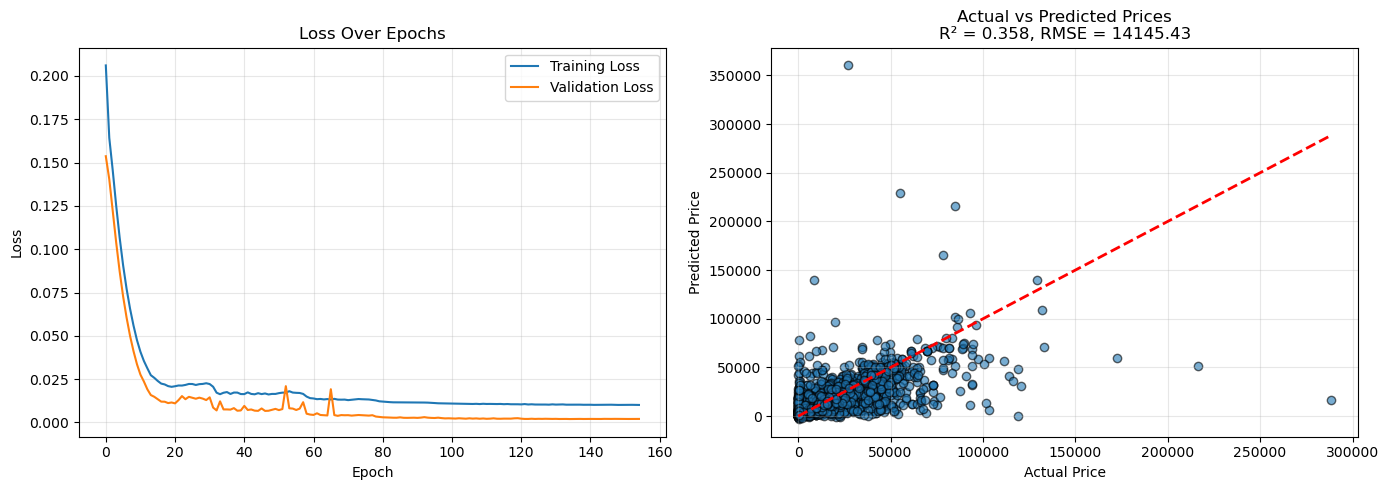

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 256)            │     2,572,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850,501 (29.95 MB)

 Trainable params: 2,616,513 (9.98 MB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 5,233,028 (19.96 MB)

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt

# --- Load dataset ---
data = pd.read_csv("car_price_prediction.csv").dropna()

# --- Preprocess data ---
X = pd.get_dummies(data.drop(columns=['Price']), drop_first=True)
y = data['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()


# --- Build improved neural network ---
def build_model(input_dim):
    reg = regularizers.l2(0.0003)

    model = keras.Sequential([
        layers.Dense(256, kernel_regularizer=reg),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.15),
        
        layers.Dense(128, kernel_regularizer=reg),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.15),
        
        layers.Dense(64, kernel_regularizer=reg),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.1),
        
        layers.Dense(32, kernel_regularizer=reg),
        layers.BatchNormalization(),
        layers.Activation('relu'),

        layers.Dense(1)
    ])
    
    return model


model = build_model(X_train_scaled.shape[1])

# --- Learning Rate Scheduler (cosine decay) ---
initial_lr = 0.001
lr_schedule = keras.optimizers.schedules.CosineDecayRestarts(
    initial_lr, first_decay_steps=50
)

# --- Compile model ---
model.compile(
    optimizer=keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-5),
    loss=keras.losses.Huber(),
    metrics=['mae']
)

# --- Callbacks ---
callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.keras", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=20, restore_best_weights=True
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss', factor=0.4, patience=10, min_lr=1e-6
    )
]


# --- Train model ---
history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_split=0.2,
    epochs=300,
    batch_size=64,
    callbacks=callbacks,
    shuffle=True,
    verbose=1
)

# --- Predictions ---
y_pred_scaled = model.predict(X_test_scaled).flatten()
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# --- Evaluation ---
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n" + "="*50)
print("IMPROVED MODEL EVALUATION")
print("="*50)
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print("="*50)

# --- Plot Training History ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title("Loss Over Epochs")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")
axes[0].grid(True, alpha=0.3)
axes[0].legend()

axes[1].scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
axes[1].plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'r--', linewidth=2)
axes[1].set_title(f"Actual vs Predicted Prices\nR² = {r2:.3f}, RMSE = {rmse:.2f}")
axes[1].set_xlabel("Actual Price")
axes[1].set_ylabel("Predicted Price")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary
model.summary()


Starting hyperparameter tuning (this will be much faster)...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=17.7min
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 3.3min
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time= 1.2min
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time= 1.2min
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time= 4.0min
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  52.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 1.3min
[CV] END max_depth=30, max_features=sq

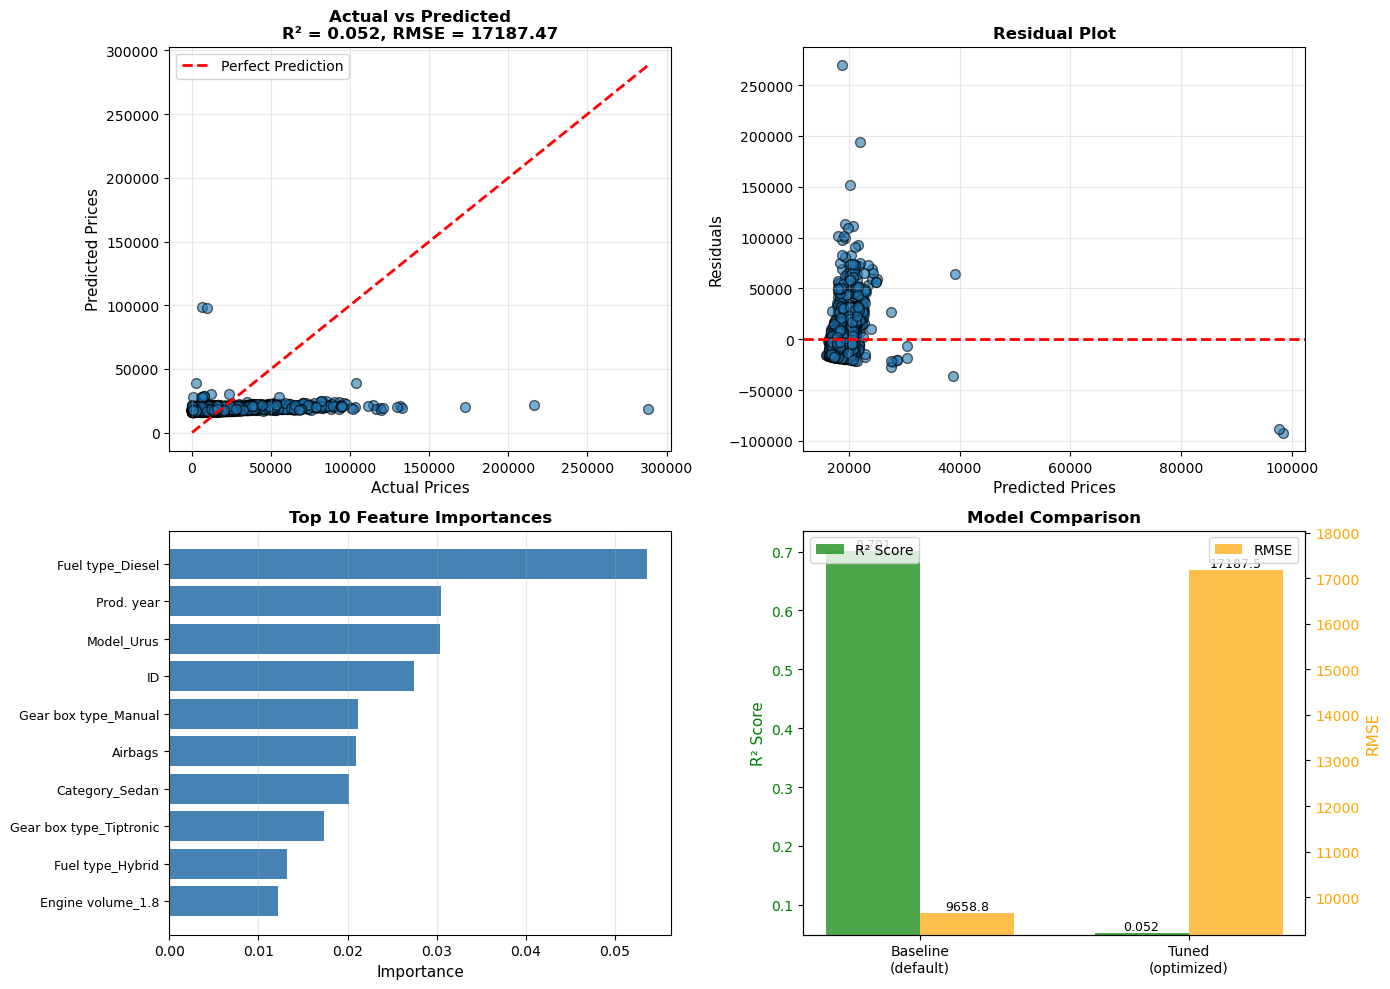

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# --- Load dataset ---
data = pd.read_csv("car_price_prediction.csv")

# --- Preprocess data ---
data = data.dropna()

# Define feature and target columns
X = data.drop(columns=['Price'])
y = data['Price']

# Convert categorical features to numeric
X = pd.get_dummies(X, drop_first=True)

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Fast Hyperparameter Tuning with RandomizedSearchCV ---
print("Starting hyperparameter tuning (this will be much faster)...")
print("="*60)

# Define parameter distribution (fewer options, faster search)
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Create base model
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Randomized search (much faster than GridSearch)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  # Only try 20 random combinations
    cv=3,  # 3-fold instead of 5-fold for speed
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit randomized search
random_search.fit(X_train, y_train)

# Get best parameters
print("\nBest Parameters Found:")
print("="*60)
for param, value in random_search.best_params_.items():
    print(f"{param}: {value}")
print(f"\nBest Cross-Validation R² Score: {random_search.best_score_:.3f}")
print("="*60)

# --- Use the best model ---
best_model = random_search.best_estimator_

# --- Make predictions ---
y_pred = best_model.predict(X_test)

# --- Evaluate tuned model ---
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("\n" + "="*60)
print("Tuned Random Forest Model Evaluation")
print("="*60)
print(f"R² Score: {r2:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print("="*60)

# --- Feature Importance ---
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10).to_string(index=False))

# --- Compare with baseline model ---
print("\n" + "="*60)
print("Comparison with Baseline Model")
print("="*60)
baseline_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)
r2_baseline = r2_score(y_test, y_pred_baseline)
rmse_baseline = np.sqrt(mean_squared_error(y_test, y_pred_baseline))

print(f"Baseline R²: {r2_baseline:.3f} | Tuned R²: {r2:.3f}")
print(f"Baseline RMSE: {rmse_baseline:.3f} | Tuned RMSE: {rmse:.3f}")
if r2 > r2_baseline:
    print(f"✓ R² Improvement: {((r2 - r2_baseline) / abs(r2_baseline) * 100):.2f}%")
if rmse < rmse_baseline:
    print(f"✓ RMSE Improvement: {((rmse_baseline - rmse) / rmse_baseline * 100):.2f}%")
print("="*60)

# --- Visualizations ---
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Actual vs Predicted
axes[0, 0].scatter(y_test, y_pred, alpha=0.6, edgecolors='k', s=50)
axes[0, 0].set_xlabel("Actual Prices", fontsize=11)
axes[0, 0].set_ylabel("Predicted Prices", fontsize=11)
axes[0, 0].set_title(f"Actual vs Predicted\nR² = {r2:.3f}, RMSE = {rmse:.2f}", fontsize=12, fontweight='bold')
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
axes[0, 0].plot(lims, lims, 'r--', linewidth=2, label='Perfect Prediction')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Residual Plot
residuals = y_test - y_pred
axes[0, 1].scatter(y_pred, residuals, alpha=0.6, edgecolors='k', s=50)
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel("Predicted Prices", fontsize=11)
axes[0, 1].set_ylabel("Residuals", fontsize=11)
axes[0, 1].set_title("Residual Plot", fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Feature Importance (Top 10)
top_features = feature_importance.head(10)
axes[1, 0].barh(range(len(top_features)), top_features['importance'], color='steelblue')
axes[1, 0].set_yticks(range(len(top_features)))
axes[1, 0].set_yticklabels(top_features['feature'], fontsize=9)
axes[1, 0].invert_yaxis()
axes[1, 0].set_xlabel("Importance", fontsize=11)
axes[1, 0].set_title("Top 10 Feature Importances", fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='x')

# 4. Model Comparison
models = ['Baseline\n(default)', 'Tuned\n(optimized)']
r2_scores = [r2_baseline, r2]
rmse_scores = [rmse_baseline, rmse]

x_pos = np.arange(len(models))
width = 0.35

bars1 = axes[1, 1].bar(x_pos - width/2, r2_scores, width, label='R² Score', color='green', alpha=0.7)
axes[1, 1].set_ylabel('R² Score', fontsize=11, color='green')
axes[1, 1].set_ylim([min(r2_scores) * 0.95, max(r2_scores) * 1.05])
axes[1, 1].tick_params(axis='y', labelcolor='green')

ax2 = axes[1, 1].twinx()
bars2 = ax2.bar(x_pos + width/2, rmse_scores, width, label='RMSE', color='orange', alpha=0.7)
ax2.set_ylabel('RMSE', fontsize=11, color='orange')
ax2.set_ylim([min(rmse_scores) * 0.95, max(rmse_scores) * 1.05])
ax2.tick_params(axis='y', labelcolor='orange')

axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(models)
axes[1, 1].set_title("Model Comparison", fontsize=12, fontweight='bold')
axes[1, 1].legend(loc='upper left')
ax2.legend(loc='upper right')

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}', ha='center', va='bottom', fontsize=9)
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()